In [1]:
# Recurrent Neural Networks (LSTM / RNN) Implementation with Keras - Python - youtube.com
# Stock Price Prediction using simple LSTM model

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load data
raw_data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=962582400&period2=1593734400&interval=1d&events=history')

In [4]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-07-03,1454.599976,1469.579956,1450.849976,1469.540039,1469.540039,451900000
1,2000-07-05,1469.540039,1469.540039,1442.449951,1446.229980,1446.229980,1019300000
2,2000-07-06,1446.229980,1461.650024,1439.560059,1456.670044,1456.670044,947300000
3,2000-07-07,1456.670044,1484.119995,1456.670044,1478.900024,1478.900024,931700000
4,2000-07-10,1478.900024,1486.560059,1474.760010,1475.619995,1475.619995,838700000


In [5]:
raw_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5027,2020-06-26,3073.199951,3073.729980,3004.629883,3009.050049,3009.050049,8098120000
5028,2020-06-29,3018.590088,3053.889893,2999.739990,3053.239990,3053.239990,4462770000
5029,2020-06-30,3050.199951,3111.510010,3047.830078,3100.290039,3100.290039,4696280000
5030,2020-07-01,3105.919922,3128.439941,3101.169922,3115.860107,3115.860107,4443130000
5031,2020-07-02,3143.639893,3165.810059,3124.520020,3130.010010,3130.010010,4190830000


In [6]:
type(raw_data)

pandas.core.frame.DataFrame

In [7]:
# Take 'Close' price
Data = np.array(raw_data['Close'])
print(Data[:10])
Data.shape

[1469.540039 1446.22998  1456.670044 1478.900024 1475.619995 1480.880005
 1492.920044 1495.839966 1509.97998  1510.48999 ]


(5032,)

In [8]:
data_max = Data.max()

In [9]:
def prepare_data(data, data_step):
    d = []
    t = []
    
    for i in range(len(data)-data_step):
        d.append([[el] for el in data[i:i+data_step]])
        t.append(data[i+data_step])
    
    return np.array(d, dtype=float), np.array(t, dtype=float)

def prepare_data_mod(data, data_step, target_step):
    d = []
    t = []
    
    for i in range(len(data)-data_step-target_size + 1):
        d.append([[el] for el in data[i:i+data_step]])
        t.append(data[i+data_step:i+data_step+target_step])
    
    return np.array(d, dtype=float), np.array(t, dtype=float)

In [10]:
step_size = 250
target_size = 20

#data, target = prepare_data(Data, step_size)
data, target = prepare_data_mod(Data, step_size, target_size)

data.shape, target.shape

((4763, 250, 1), (4763, 20))

In [11]:
data_last = data[len(data)-1]
data = data[:len(data)-1]
target_last = target[len(target)-1]
target = target[:len(target)-1]
print(data.shape, target.shape)

(4762, 250, 1) (4762, 20)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3809, 250, 1), (3809, 20), (953, 250, 1), (953, 20))

In [13]:
#x_test, y_test

In [14]:
# Normalize data - divide by maximum
x_train = x_train/data_max
x_test = x_test/data_max
y_train = y_train/data_max
y_test = y_test/data_max

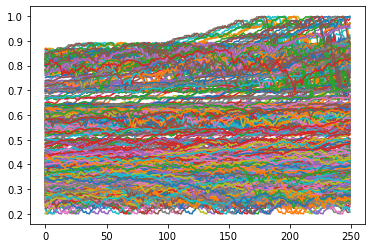

In [15]:
for el in x_test:
    plt.plot(el)
plt.show();

In [16]:
#Building model
model = Sequential()
model.add(LSTM(10, batch_input_shape=(None, None, 1) , return_sequences=True))
model.add(LSTM(20, return_sequences=False))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 10)          480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                2480      
Total params: 2,960
Trainable params: 2,960
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
120/120 [==============================] - 20s 168ms/step - loss: 0.0625 - accuracy: 0.0381 - val_loss: 0.0051 - val_accuracy: 0.0588
Epoch 2/10
120/120 [==============================] - 18s 150ms/step - loss: 0.0020 - accuracy: 0.0457 - val_loss: 9.8182e-04 - val_accuracy: 0.0640
Epoch 3/10
120/120 [==============================] - 22s 180ms/step - loss: 7.5609e-04 - accuracy: 0.0438 - val_loss: 6.3501e-04 - val_accuracy: 0.0630
Epoch 4/10
120/120 [==============================] - 22s 180ms/step - loss: 6.2225e-04 - accuracy: 0.0433 - val_loss: 6.1777e-04 - val_accuracy: 0.0546
Epoch 5/10
120/120 [==============================] - 22s 182ms/step - loss: 5.9414e-04 - accuracy: 0.0441 - val_loss: 5.8023e-04 - val_accuracy: 0.0577
Epoch 6/10
120/120 [==============================] - 19s 160ms/step - loss: 5.8342e-04 - accuracy: 0.0478 - val_loss: 0.0011 - val_accuracy: 0.0630
Epoch 7/10
120/120 [==============================] - 19s 160ms/step - loss: 5.9131e-04 - accuracy

In [19]:
x_test.shape, data_last.shape

((953, 250, 1), (250, 1))

In [20]:
results = model.predict(x_test)

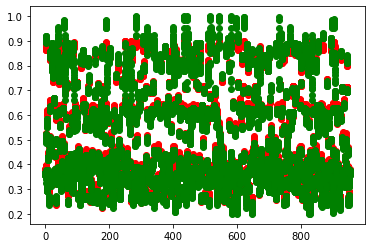

In [21]:
plt.plot(range(len(results)), results, 'ro')
plt.plot(range(len(results)), y_test, 'go')
plt.show()

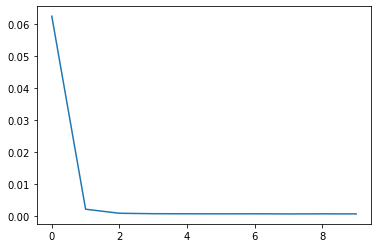

In [22]:
plt.plot(history.history['loss'])
plt.show()

In [23]:
def plot_graphs(dd, tg, res):
    plt.plot(range(len(dd)), dd, 'r')
    plt.plot(range(len(dd), len(dd)+target_size), tg, 'b')
    plt.plot([j for j in range(len(dd), len(dd)+target_size)], np.reshape(res, (20, 1)), 'g')
    plt.show();

[0.32635589]


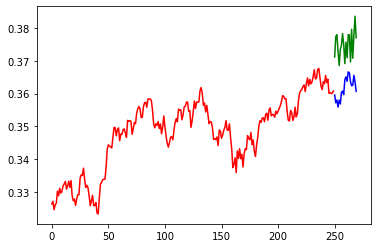

[0.42995143]


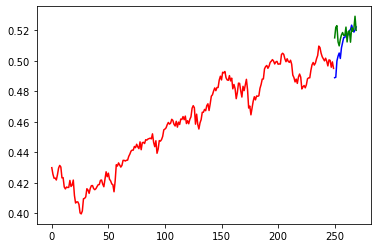

[0.43664637]


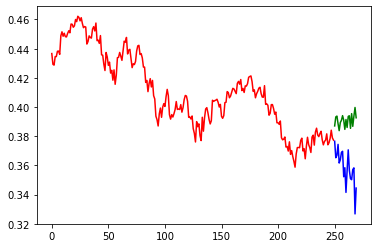

[0.78516605]


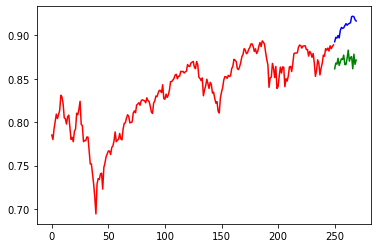

[0.49960871]


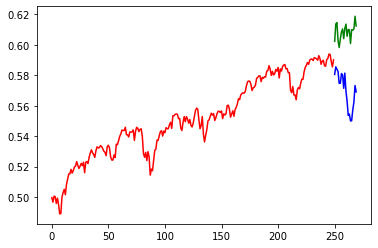

[0.26667159]


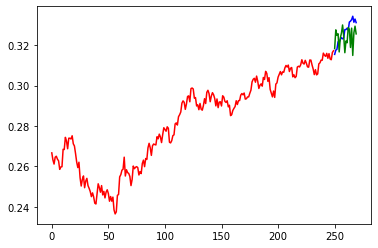

[0.28076135]


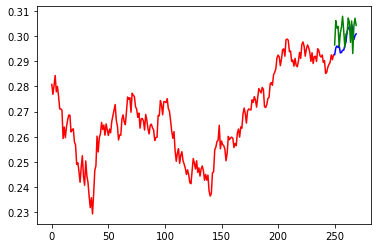

[0.35248586]


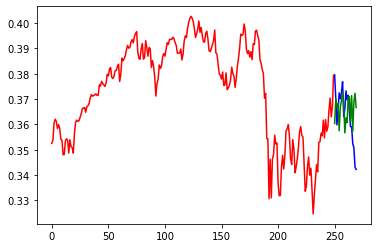

[0.32462532]


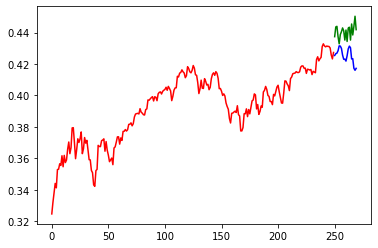

[0.33247788]


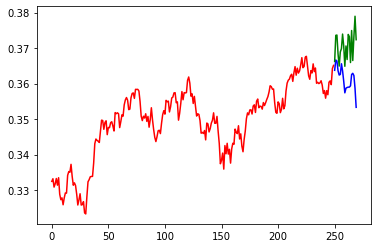

In [24]:
for ind in range(10):
    print(x_test[ind][0])
    dd = x_test[ind]
    tg = y_test[ind]
    dl = np.reshape(dd, (1, x_test.shape[1], 1))
    res = model.predict(dl)
    plot_graphs(dd, tg, res)

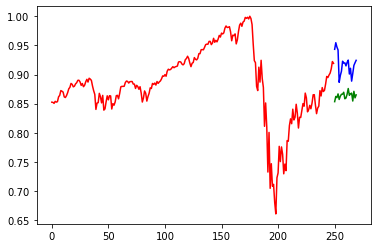

In [25]:
d_last = data_last / data_max
t_last = target_last / data_max

dd = d_last
tg = t_last
dl = np.reshape(dd, (1, x_test.shape[1], 1))
res = model.predict(dl)
#print(res)
plot_graphs(dd, tg, res)

In [26]:
print(res)

[[0.85340726 0.86233574 0.8602777  0.86671144 0.8571884  0.86273265
  0.8661342  0.86622053 0.8695372  0.85835236 0.85962236 0.8661038
  0.875953   0.8642799  0.86689794 0.8680841  0.8544987  0.8711033
  0.8599391  0.86501807]]
